In [172]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
data = pd.read_csv('data3a.csv')

In [174]:
data['f_int'] = (data['f'] == 'T').astype(int)

In [175]:
data['x^2'] = data['x']**2
data['x^3'] = data['x']**3
data['x^4'] = data['x']**4
data['x^5'] = data['x']**5
data['x^6'] = data['x']**6

In [176]:
data.x_c = sm.add_constant(data[['x','x^2','x^3','x^4','x^5','x^6']])

パラメータ数7の多項式回帰（ポアソン回帰）

In [177]:
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       93
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -232.58
Date:                Thu, 21 Jul 2016   Deviance:                       79.382
Time:                        16:31:51   Pearson chi2:                     76.7
No. Iterations:                   100                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8185.6246   7764.769      1.054      0.292     -7033.043  2.34e+04
x          -4980.3818   4833.705     -1.030      0.303     -1.45e+04  4493.505
x^2         1251.8054   1245.517      1.005      0.315     -1189.364  3692.974
x^3         -166.4112    170.082     -0.978      0.328      -499.767   166.944
x^4           12.3450     12.985      0.951      0.342       -13.105    37.795
x^5           -0.4847      0.526     -0.922      0.356        -1.515     0.545
x^6            0.0079      0.009      0.893      0.372        -0.009     0.025
==============================================================================
"""

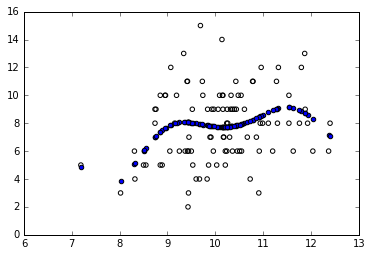

In [178]:
x=np.arange(min(data.x),max(data.x),1)
plt.scatter(data.x,data.y,facecolors='none')
plt.scatter(data.x,model.fit().predict(data.x_c),)
plt.show()

In [183]:
model = sm.GLM(data.y,data.x_c['const'],family=sm.families.Poisson())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Thu, 21 Jul 2016   Deviance:                       89.507
Time:                        16:33:24   Pearson chi2:                     87.1
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0580      0.036     57.586      0.000         1.988     2.128
==============================================================================
"""

パラメータ数１のポアソン回帰

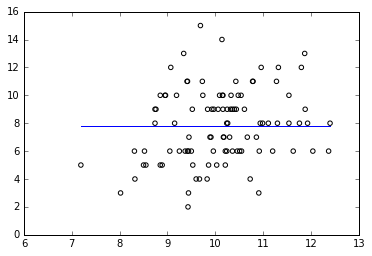

In [184]:
x=np.arange(min(data.x),max(data.x),1)
plt.scatter(data.x,data.y,facecolors='none')
plt.plot(data.x,model.fit().predict(data.x_c['const']),)
plt.show()

In [187]:
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data.y,data.x_c,sm.families.Poisson())
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 21 Jul 2016   Deviance:                       84.993
Time:                        16:34:50   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000         0.579     2.005
x              0.0757      0.036      2.125      0.034         0.006     0.145
==============================================================================
"""

フルモデルの対数尤度は他の、どのポアソン回帰よりも対数尤度は大きくなる。

In [162]:
from scipy import stats
log_likewood = np.sum(np.log(stats.poisson.pmf(data.y,data.y)))
deviance = -2*log_likewood
print("対数尤度：%f") %log_likewood
print('最小の逸脱度:%f') %deviance

対数尤度：-192.889753
最小の逸脱度:385.779505


In [163]:
log_likewood

-192.88975252449595

赤池情報基準（AIC）が一番小さいモデルが良いモデルとされる。

In [209]:
result=model.fit()
print('AIC:%f') %result.aic

AIC:474.772502


In [248]:
import itertools
column = ['f_int','x']
sumarry = []
for i in range(2):
    for a in itertools.combinations(column,i+1):
        a_array = np.array(a)
        data.x_c = sm.add_constant(data[a_array])
        model = sm.GLM(data.y,data.x_c,sm.families.Poisson())
        res = model.fit()
        sumarry.append([a_array,res.df_model+1,res.llf,-2*res.llf,res.deviance,res.aic])
result_table = pd.DataFrame(sumarry,columns=['model','k','logL','deviance','residual deviance','AIC'])

In [249]:
result_table

,model,k,logL,deviance,residual deviance,AIC
0,[f_int],2,-237.627257,475.254514,89.475009,479.254514
1,[x],2,-235.386251,470.772502,84.992996,474.772502
2,"[f_int, x]",3,-235.293719,470.587438,84.807933,476.587438
